In [1]:
# Data Handling & Manipulation
import pandas as pd                                         # for dataframes, CSV/Excel reading, tabular data manipulation
import numpy as np                                          # for numerical operations and array handling
import datetime                                             # for date and time manipulation
from datetime import datetime, timedelta                    # for date arithmetic (e.g., adding days)


# Data Visualisation (Static)
import matplotlib.pyplot as plt                             # for creating static plots
from matplotlib.ticker import FuncFormatter                 # for customising tick labels (e.g., currency, %)
import seaborn as sns                                       # for statistical visualisation (heatmaps, distplots, etc.)

# Data Visualisation (Interactive)
import plotly.express as px                                 # for quick and interactive visualisation
import plotly.graph_objects as go                           # for custom interactive plots
from plotly.subplots import make_subplots                   # for interactive subplots

# Data Quality & Missing Value Visualisation
import missingno as msno                                    # for visualising missing data patterns

# Statistical Testing & Inference
from statsmodels.stats.proportion import proportions_ztest  # for comparing proportions (e.g., late vs. on-time)
from scipy.stats import (
    normaltest,                                             # for checking normality
    chi2_contingency,                                       # for categorical association
    mannwhitneyu,                                           # for non-parametric testing
    ttest_ind,                                              # for independent sample t-test
    f_oneway,                                               # for one-way ANOVA
    kruskal,                                                # for Kruskal-Wallis test
    kstest,                                                 # for Kolmogorov-Smirnov test
    spearmanr,                                              # for Spearman correlation
    pointbiserialr                                          # for point-biserial correlation (binary vs. continuous)
)
import statsmodels.api as sm                                # for advanced statistical modelling and diagnostics
import statsmodels.formula.api as smf                       # for formula-based statistical models
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # for post-hoc tests after ANOVA

# System & Settings
import os                                                   # for file handling and directory operations
import warnings                                             # to suppress or manage warning messages
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)                 # display full content in cells (useful for text data)

# Machine Learning & Model Evaluation
import joblib                                               # for saving and loading ML models
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    average_precision_score, precision_recall_fscore_support,
    confusion_matrix, PrecisionRecallDisplay, make_scorer, roc_auc_score,
    classification_report, roc_curve, auc, fbeta_score
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier           # for KNN classifier (added since it's in your benchmark)
from sklearn.tree import DecisionTreeClassifier              # for Decision Tree classifier (added since it's in your benchmark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from xgboost import XGBClassifier                           # for XGBoost classifier
from lightgbm import LGBMClassifier                         # for LightGBM classifier
from catboost import CatBoostClassifier, Pool               # for CatBoost classifier

In [2]:
# List of date columns for each Olist dataset:
# This dictionary maps each dataset filename to a list of columns that should be parsed as dates.
date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
    'master_olist_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
        'shipping_limit_date',
        'review_creation_date',
        'review_answer_timestamp',
    ],
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv':
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list:
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any):
    return pd.read_csv(path, parse_dates=parse_dates)

In [3]:
df = read_olist_csv('../data/cleaned_data/olist_ml_ready_dataset.csv')
df.head()

,purchase_to_approve_hrs,approve_to_estimated_days,approve_to_shipping_limit_days,purchase_hour,purchase_dow,purchase_month,is_weekend,is_brazil_holiday,distance_km,same_state,...,seller_90d_order_count,sum_freight_value,price,total_payment_value,customer_state,seller_state,freight_value,product_category_name_english,payment_types,is_late
0,0.178333,15,4,10,0,10,0,0,18.657513,1,...,42.0,8.72,29.99,38.71,SP,SP,8.72,housewares,"credit_card, voucher",False
1,30.713889,17,4,20,1,7,0,0,861.068703,0,...,58.0,22.76,118.70,141.46,BA,SP,22.76,perfumery,boleto,False
2,0.276111,26,5,8,2,8,0,0,514.560686,0,...,237.0,19.22,159.90,179.12,GO,SP,19.22,auto,credit_card,False
3,0.298056,26,5,19,5,11,1,0,1821.871635,0,...,28.0,27.20,45.00,72.20,RN,MG,27.20,pet_shop,credit_card,False
4,1.030556,12,5,21,1,2,0,0,29.623876,1,...,38.0,8.72,19.90,28.62,SP,SP,8.72,stationery,credit_card,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   purchase_to_approve_hrs                 109933 non-null  float64
 1   approve_to_estimated_days               109933 non-null  int64  
 2   approve_to_shipping_limit_days          109933 non-null  int64  
 3   purchase_hour                           109933 non-null  int64  
 4   purchase_dow                            109933 non-null  int64  
 5   purchase_month                          109933 non-null  int64  
 6   is_weekend                              109933 non-null  int64  
 7   is_brazil_holiday                       109933 non-null  int64  
 8   distance_km                             109933 non-null  float64
 9   same_state                              109933 non-null  int64  
 10  freight_ratio                           1099

## Data Checking

Change the target variable (`is_late`) to an int for the model training

In [5]:
df['is_late'] = df['is_late'].astype(int)

Based on the check after Feature Engineering, all of the numerical features have non-normal distributions, and most are skewed. However, the outliers are all valid real data, so instead of removing them, we'll handle them using RobustScaler

Categorical features descriptive statistics:

In [6]:
df.describe(include=['O'])

,customer_state,seller_state,product_category_name_english,payment_types
count,109933,109933,109933,109933
unique,27,22,74,6
top,SP,SP,bed_bath_table,credit_card
freq,46345,78416,10929,81901


## Constant Variables

We use an 80-20 train-test split to ensure the model has sufficient data (80%) to learn patterns while reserving a smaller portion (20%) for unbiased evaluation of its performance. This ratio balances training effectiveness and reliable testing with 100k+ rows.

In [7]:
TEST_SIZE = 0.2
RANDOM_STATE = 21

## Data Splitting

In [8]:
# Separate X and y
X = df.drop(columns=['is_late'])
y = df['is_late']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    stratify=y, 
    random_state=RANDOM_STATE
)

print(y_train.mean(), y_test.mean())  # Quick check: class balance is preserved

0.07920769563141018 0.0792286351025606


The `stratify=y` parameter ensures that the train and test sets maintain the same class distribution as the original dataset. This is particularly important for imbalanced classification problems here where the minority class (late orders) might otherwise be underrepresented in the test set. By stratifying, we preserve the class proportions, enabling more reliable evaluation of model performance. 

In [10]:
# Print shape of the original X and y
print("Original data shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Print shape of train and test data
print("\nTrain-test split shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Print class distribution in train and test sets
print("\nClass distribution:")
print(f"y_train value counts: {y_train.value_counts()}")
print(f"y_test value counts: {y_test.value_counts()}")

Original data shapes:
X shape: (109933, 27)
y shape: (109933,)

Train-test split shapes:
X_train shape: (87946, 27)
y_train shape: (87946,)
X_test shape: (21987, 27)
y_test shape: (21987,)

Class distribution:
y_train value counts: is_late
0    80980
1     6966
Name: count, dtype: int64
y_test value counts: is_late
0    20245
1     1742
Name: count, dtype: int64


## Data Preprocessing

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109933 entries, 0 to 109932
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   purchase_to_approve_hrs                 109933 non-null  float64
 1   approve_to_estimated_days               109933 non-null  int64  
 2   approve_to_shipping_limit_days          109933 non-null  int64  
 3   purchase_hour                           109933 non-null  int64  
 4   purchase_dow                            109933 non-null  int64  
 5   purchase_month                          109933 non-null  int64  
 6   is_weekend                              109933 non-null  int64  
 7   is_brazil_holiday                       109933 non-null  int64  
 8   distance_km                             109933 non-null  float64
 9   same_state                              109933 non-null  int64  
 10  freight_ratio                           1099

In [12]:
# Define column groups
num_cols = [
    'purchase_to_approve_hrs', 'approve_to_estimated_days', 'approve_to_shipping_limit_days',
    'distance_km', 'freight_ratio', 'seller_dispatch_hub', 'seller_30d_order_count', 'seller_30d_dispatch_late_rate_raw',
    'seller_30d_dispatch_late_rate_smoothed', 'seller_90d_order_count', 'seller_90d_dispatch_late_rate_raw',
    'seller_90d_dispatch_late_rate_smoothed', 'sum_freight_value', 'price',
    'total_payment_value', 'freight_value'
]
bin_cols = [
    'is_weekend', 'is_brazil_holiday', 'same_state', 'customer_is_remote'
]
cat_cols = [
    'customer_state', 'seller_state', 'product_category_name_english', 'payment_types',
    'purchase_hour', 'purchase_dow', 'purchase_month'
]

The preprocessing pipeline is designed to handle the diverse feature types in the dataset effectively:

1. **Numerical Features**:
    - **Scaling**: `RobustScaler` is used to handle skewed distributions and outliers. Unlike `StandardScaler`, it is robust to extreme values, making it suitable for features with valid outliers.
    - **Features**: Includes continuous variables like `distance_km`, `freight_ratio`, and `price`.

2. **Categorical Features**:
    - **Encoding**: `OneHotEncoder` is applied to convert categorical variables into binary columns. The `drop='first'` parameter avoids multicollinearity by dropping one category per feature.
    - **Handling Unknowns**: `handle_unknown="ignore"` ensures the pipeline can process unseen categories during inference without errors.
    - **Features**: Includes variables like `customer_state`, `seller_state`, and `product_category_name_english`.

3. **Binary Features**:
    - **Passthrough**: Binary features like `is_weekend` and `same_state` are passed through without transformation since they are already in a usable format.

4. **Tree-Based Models**:
    - For `CatBoost`, preprocessing is set to `"passthrough"` since this model handle categorical features natively without requiring one-hot encoding.

This preprocessing strategy ensures that the data is appropriately transformed for each model type while preserving interpretability and robustness.

In [13]:
# Preprocessing pipeline for sklearn models (OHE + scaler)
preprocess_ohe = ColumnTransformer([
    ("num", RobustScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', handle_unknown="ignore"), cat_cols),
    ("bin", "passthrough", bin_cols)
])

# 5. For CatBoost: no OHE (native handling)
preprocess_passthrough = "passthrough"

In [14]:
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    "Dummy":         (DummyClassifier(strategy="most_frequent"), preprocess_passthrough),
    "LogReg":        (LogisticRegression(max_iter=300, class_weight="balanced", solver="lbfgs", random_state=RANDOM_STATE), preprocess_ohe),
    "DecisionTree":  (DecisionTreeClassifier(max_depth=None, min_samples_leaf=10, class_weight="balanced", random_state=RANDOM_STATE), preprocess_ohe),
    "RandomForest":  (RandomForestClassifier(n_estimators=300, max_depth=None, class_weight="balanced", n_jobs=-1, random_state=RANDOM_STATE), preprocess_ohe),
    "XGBoost":      (XGBClassifier(
                        n_estimators=300,
                        learning_rate=0.1,
                        scale_pos_weight=pos_weight,
                        use_label_encoder=False,         
                        eval_metric='logloss',
                        n_jobs=-1,
                        random_state=RANDOM_STATE
                     ),     preprocess_ohe),
    "LightGBM":      (LGBMClassifier(n_estimators=300, learning_rate=0.1, class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1), preprocess_ohe),
    "CatBoost":      (CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, random_state=RANDOM_STATE, verbose=0, cat_features=cat_cols, allow_writing_files=False), preprocess_passthrough)
}

In [15]:
model_path = "../models/best_rf_pipeline.pkl"

In [16]:
import joblib
best_est = joblib.load(model_path)

In [17]:
best_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['purchase_to_approve_hrs',
                                                   'approve_to_estimated_days',
                                                   'approve_to_shipping_limit_days',
                                                   'distance_km',
                                                   'freight_ratio',
                                                   'seller_dispatch_hub',
                                                   'seller_30d_order_count',
                                                   'seller_30d_dispatch_late_rate_raw',
                                                   'seller_30d_dispatch_late_rate_smoothed',
                                                   'seller_90d_order_count'...
                                                                handle_unknown='ignore'),
                                                  ['customer_state',
                                                   'seller_state',
                                                   'product_category_name_english',
                                                   'payment_types',
                                                   'purchase_hour',
                                                   'purchase_dow',
                                                   'purchase_month']),
                                                 ('bin', 'passthrough',
                                                  ['is_weekend',
                                                   'is_brazil_holiday',
                                                   'same_state',
                                                   'customer_is_remote'])])),
                ('model',
                 RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=40,
                                        n_estimators=300, n_jobs=-1,
                                        random_state=21))])

Check the loaded model:

In [18]:
max_f2_thr = 0.1091

y_prob = best_est.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= max_f2_thr).astype(int)

# --- core metrics --------------------------------------------------
pr_auc  = average_precision_score(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"PR-AUC   : {pr_auc:.3f}")
print(f"ROC-AUC  : {roc_auc:.3f}\n")
print("Classification report (threshold 0.1091):")
print(classification_report(y_test, y_pred, digits=3))

# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=["Actual On-time","Actual Late"],
                  columns=["Pred On-time","Pred Late"])
print("\nConfusion matrix:")
display(cm)

PR-AUC   : 0.517
ROC-AUC  : 0.861

Classification report (threshold 0.1091):
              precision    recall  f1-score   support

           0      0.972     0.839     0.901     20245
           1      0.278     0.723     0.402      1742

    accuracy                          0.829     21987
   macro avg      0.625     0.781     0.651     21987
weighted avg      0.917     0.829     0.861     21987


Confusion matrix:


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Pred On-time,Pred Late
Actual On-time,16977,3268
Actual Late,483,1259


## Explainable AI

### SHAP

In [19]:
# ==================== Get Importances ====================
preproc = best_est.named_steps["preprocess"]
rf      = best_est.named_steps["model"]

# after preprocessing
feature_names = preproc.get_feature_names_out()
X_train_proc = preproc.transform(X_train)
if hasattr(X_train_proc, "toarray"):
    X_train_proc = X_train_proc.toarray()

# make a DataFrame
import pandas as pd
X_train_df = pd.DataFrame(X_train_proc, columns=feature_names)

# sample for speed
X_sample = X_train_df.sample(n=2000, random_state=RANDOM_STATE)

import shap

explainer = shap.TreeExplainer(
    rf,
    data=X_train_df,                   # background for interventional estimation
    feature_perturbation="interventional"
)

shap_exp = explainer(X_sample)

print("raw shap_exp.values.shape:", shap_exp.values.shape)
# (2000, 184, 2)

# slice off the last dimension for class=1
shap_vals = shap_exp.values[:, :, 1]
print("sliced shap_vals.shape:", shap_vals.shape)
# (2000, 184)

# sanity‑check X_sample
print("X_sample.shape:", X_sample.shape)
# (2000, 184)

100%|===================| 3999/4000 [68:26<00:01]        

raw shap_exp.values.shape: (2000, 184, 2)
sliced shap_vals.shape: (2000, 184)
X_sample.shape: (2000, 184)


Show the SHAP plot

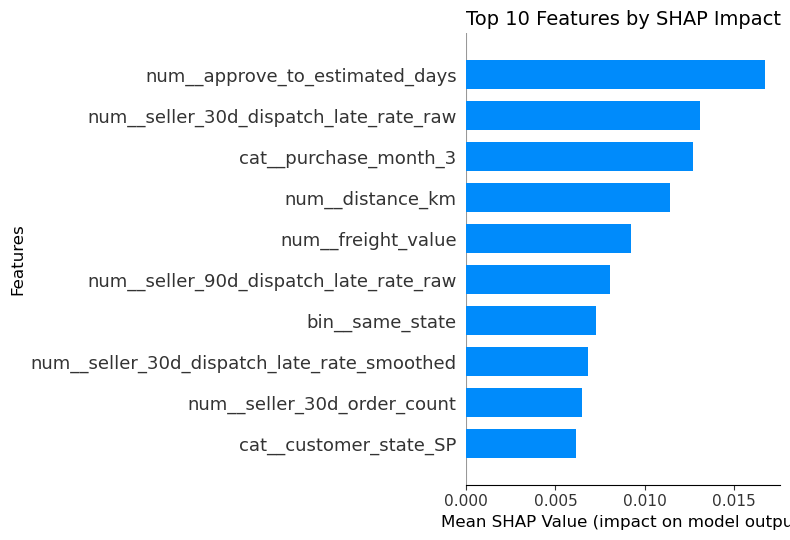

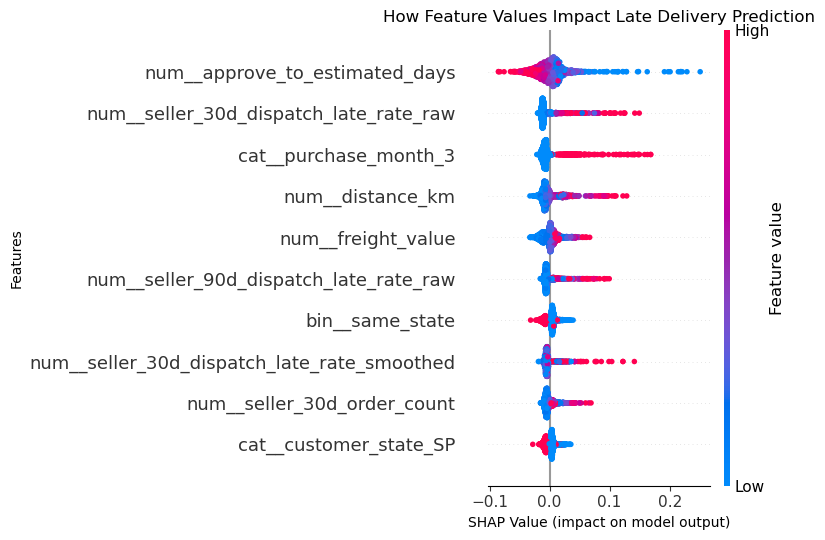

In [20]:
# Basic summary plot with better titles and labels
plt.figure(figsize=(14, 10))
shap.summary_plot(
    shap_vals,
    X_sample,
    feature_names=feature_names,
    plot_type="bar",
    max_display=10,
    title="Feature Impact on Late Delivery Prediction",
    show=False
)
plt.title("Top 10 Features by SHAP Impact", fontsize=14)
plt.xlabel("Mean SHAP Value (impact on model output)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

# Detailed distribution plot showing value impact
plt.figure(figsize=(14, 10))
shap.summary_plot(
    shap_vals,
    X_sample,
    feature_names=feature_names,
    max_display=10,
    show=False
)
plt.title("How Feature Values Impact Late Delivery Prediction", fontsize=12)
plt.xlabel("SHAP Value (impact on model output)", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.tight_layout()
plt.show()

Show the aggregated SHAP importance

In [21]:
import re

fn = np.array(feature_names)

def base_feature(name: str) -> str:
    # strip transformer prefix like "num__", "cat__", "bin__"
    name = re.sub(r'^(num|cat|bin)__', '', name)
    # collapse one-hot suffix -> keep everything before the last "_"
    # e.g. "purchase_month_7" -> "purchase_month"
    #      "customer_state_RJ" -> "customer_state"
    parts = name.split('_')
    return '_'.join(parts[:-1]) if len(parts) > 1 else name

groups = np.array([base_feature(f) for f in fn])

# Aggregate SHAP by original feature (sum signed contributions across its OHE columns)
shap_group_df = pd.DataFrame(shap_vals, columns=fn).groupby(groups, axis=1).sum()

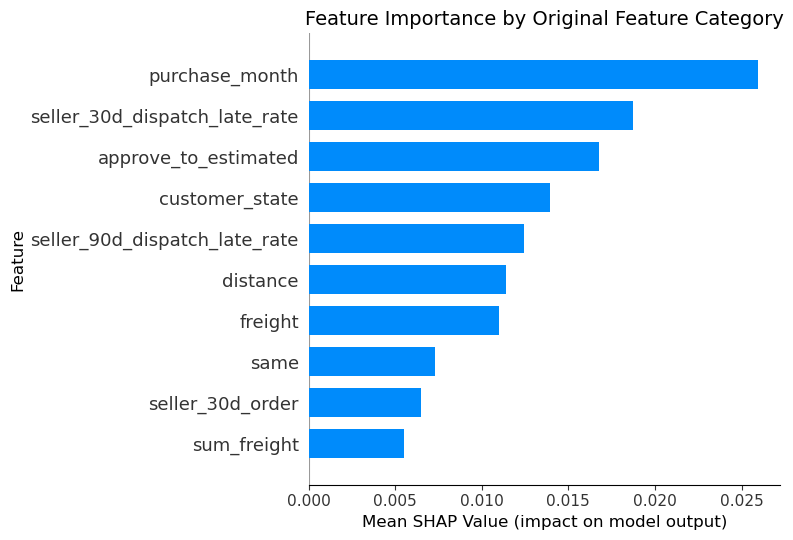

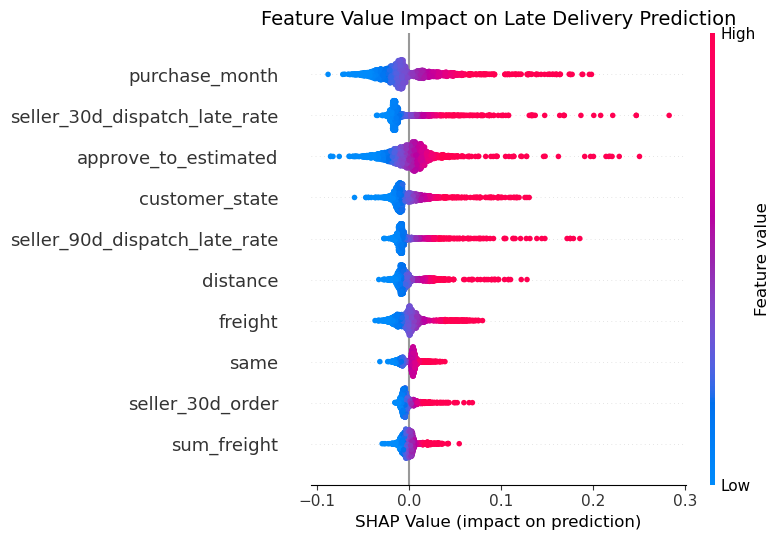

In [22]:
# Plot aggregated bar chart
# Create a better aggregated feature importance plot
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_group_df.values,
    feature_names=shap_group_df.columns.tolist(),
    plot_type="bar",
    max_display=10,
    show=False
)
plt.title("Feature Importance by Original Feature Category", fontsize=14)
plt.xlabel("Mean SHAP Value (impact on model output)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Also create a beeswarm plot to see value impact directions
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_group_df.values,
    shap_group_df,
    max_display=10,
    show=False
)
plt.title("Feature Value Impact on Late Delivery Prediction", fontsize=14)
plt.xlabel("SHAP Value (impact on prediction)", fontsize=12)
plt.tight_layout()
plt.show()

See single categorical features SHAP

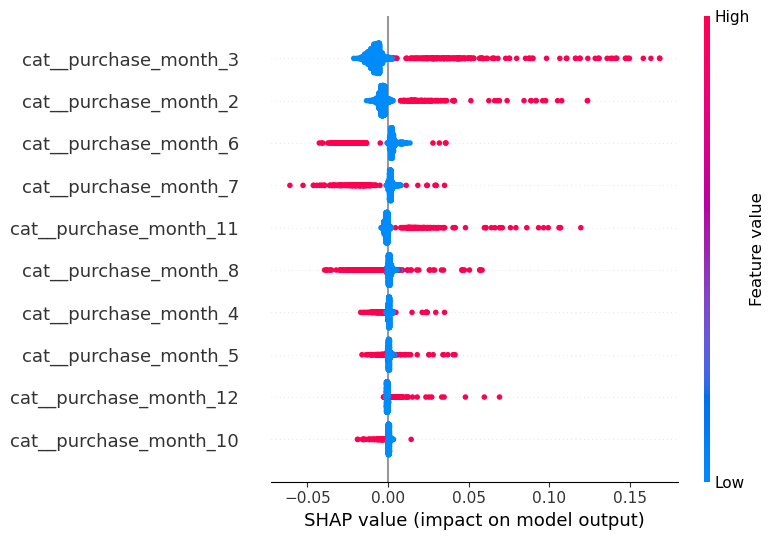

In [23]:
# focus on a single categorical family
mask = groups == "purchase_month"
shap.summary_plot(
    shap_vals[:, mask],
    X_sample.iloc[:, mask],            # coloring by the one-hot columns
    feature_names=fn[mask],
    max_display=10
)

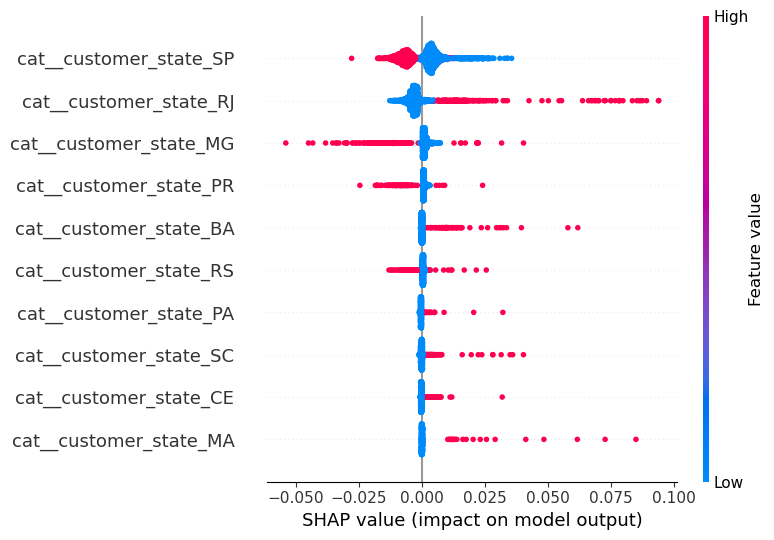

In [24]:
mask = groups == "customer_state"
shap.summary_plot(
    shap_vals[:, mask],
    X_sample.iloc[:, mask],
    feature_names=fn[mask],
    max_display=10
)

See an example prediction

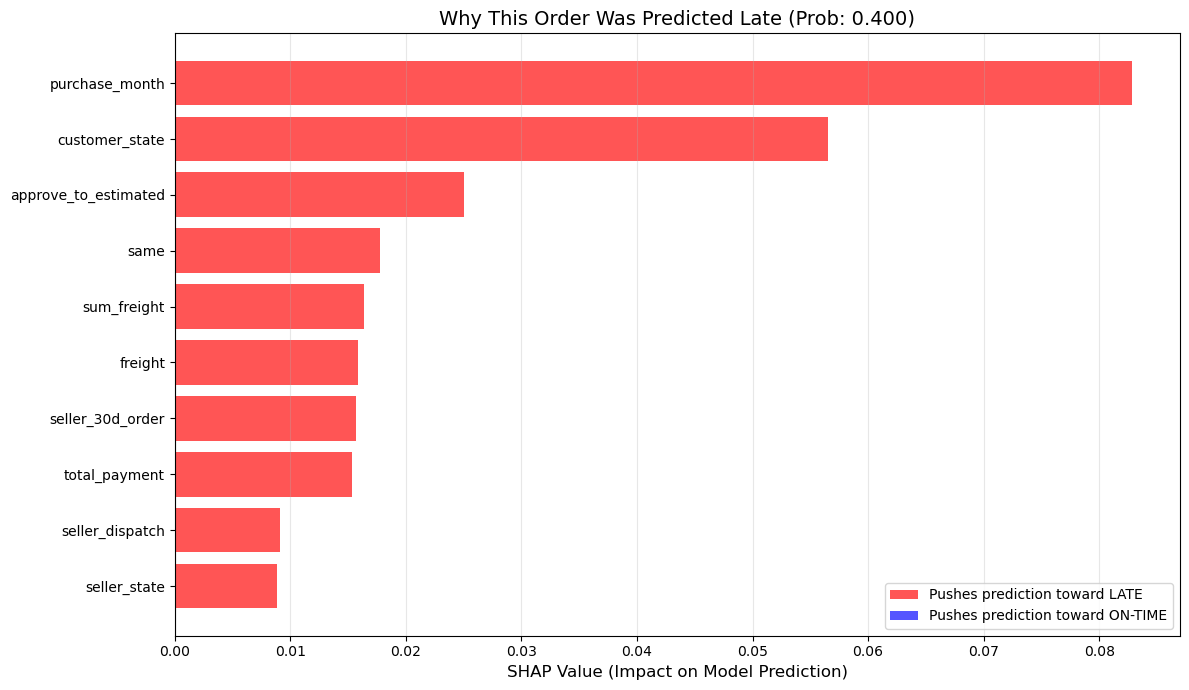

Example Order Information:
- distance_km: 357.79082007979247
- seller_30d_dispatch_late_rate_smoothed: 0.0208333333333333
- seller_90d_dispatch_late_rate_smoothed: 0.0204081632653061
- approve_to_estimated_days: 18
- product_category: electronics

Actual outcome: LATE
Model prediction: LATE (probability: 0.4005)
Threshold used: 0.1091


In [25]:
# Select a random late delivery example
late_indices = np.where(y_test == 1)[0]
random_late_idx = late_indices[RANDOM_STATE]
example = X_test.iloc[random_late_idx:random_late_idx+1]

# Get prediction and probability
example_prob = best_est.predict_proba(example)[0, 1]
example_pred = int(example_prob >= 0.1091)

# Create SHAP explainer
explainer = shap.TreeExplainer(
    rf, 
    data=X_train_df,
    feature_perturbation="interventional"
)

# Get SHAP values for the example
example_transformed = preproc.transform(example)
if hasattr(example_transformed, "toarray"):
    example_transformed = example_transformed.toarray()
example_df = pd.DataFrame(example_transformed, columns=feature_names)

# Calculate SHAP values
shap_values = explainer(example_df).values[0, :, 1]

# Group features by their base names
feature_groups = np.array([base_feature(f) for f in feature_names])
grouped_shap = pd.Series(shap_values, index=feature_names).groupby(feature_groups).sum().sort_values(key=abs)

# Get top 10 most influential features
top_features = grouped_shap.iloc[-10:]

# Create a waterfall plot with better formatting
plt.figure(figsize=(12, 7))
colors = ['#ff5555' if x > 0 else '#5555ff' for x in top_features.values]
bars = plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), [f"{name} = {example[name].values[0] if name in example.columns else 'N/A':.2f}" 
                                     if name in num_cols else name for name in top_features.index])
plt.title(f"Why This Order Was Predicted {'Late' if example_pred == 1 else 'On-time'} (Prob: {example_prob:.3f})", fontsize=14)
plt.xlabel("SHAP Value (Impact on Model Prediction)", fontsize=12)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Add a legend
red_patch = plt.Rectangle((0, 0), 1, 1, fc='#ff5555')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc='#5555ff')
plt.legend([red_patch, blue_patch], ['Pushes prediction toward LATE', 'Pushes prediction toward ON-TIME'], 
           loc='lower right')

plt.tight_layout()
plt.show()

# Print order context information
print(f"Example Order Information:")
for col in ['distance_km', 'seller_30d_dispatch_late_rate_smoothed', 
            'seller_90d_dispatch_late_rate_smoothed', 'approve_to_estimated_days']:
    if col in example.columns:
        print(f"- {col}: {example[col].values[0]}")
        
if 'product_category_name_english' in example.columns:
    print(f"- product_category: {example['product_category_name_english'].values[0]}")
        
print(f"\nActual outcome: {'LATE' if y_test.iloc[random_late_idx] == 1 else 'ON-TIME'}")
print(f"Model prediction: {'LATE' if example_pred == 1 else 'ON-TIME'} (probability: {example_prob:.4f})")
print(f"Threshold used: 0.1091")